In [1]:
import sys
import os
# Adding the src directory to the Python path
sys.path.append(os.path.abspath('../src'))
from utils import load_saved_model
from model_evaluation import get_test_dataset, evaluate_model, display_and_save_confution_matrix

2024-07-06 13:03:43.016780: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
# Setting up variables
test_dir = '../datasets/ready/test'
cm_save_path = '../results/cm.png'
image_width = 28
image_height = 28

#Loading the model
model = load_saved_model('../models')

#loading the test data
test_dataset = get_test_dataset(test_dir, image_width, image_height)


2024-07-06 13:03:44.369821: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2024-07-06 13:03:44.517590: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-06 13:03:44.517697: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3060 Laptop GPU computeCapability: 8.6
coreClock: 1.425GHz coreCount: 30 deviceMemorySize: 6.00GiB deviceMemoryBandwidth: 312.97GiB/s
2024-07-06 13:03:44.517833: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2024-07-06 13:03:44.527960: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2024-07-06 13:03:44.528102: I tensorflow/str

Found 10494 files belonging to 10 classes.


In [3]:
test_loss, test_acc, cm, true_labels, predicted_labels, f1, precision, recall = evaluate_model(model, test_dataset)
print(f'Test accuracy: {test_acc}   test_loss: {test_loss}')
print(f'precision: {precision}   recall: {recall}')
print(f' f1: {f1}')


2024-07-06 13:03:52.810289: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2024-07-06 13:03:52.811071: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2495995000 Hz
2024-07-06 13:04:03.380690: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2024-07-06 13:04:05.953979: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8100
2024-07-06 13:04:14.289589: E tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-07-06 13:04:14.289661: W tensorflow/stream_executor/gpu/asm_compiler.cc:56] Couldn't invoke ptxas --version
2024-07-06 13:04:14.366363: E tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-07-06 13:04:14.366547: W tensorflow/stream_executor/gpu/redzone_allocator.cc:31

328/328 [==============================] - 8s 23ms/step - loss: 0.0658 - accuracy: 0.9868
              precision    recall  f1-score   support

           0       0.10      0.10      0.10      1035
           1       0.11      0.11      0.11      1181
           2       0.08      0.08      0.08      1048
           3       0.11      0.11      0.11      1071
           4       0.09      0.09      0.09      1023
           5       0.09      0.09      0.09       946
           6       0.11      0.11      0.11      1031
           7       0.10      0.10      0.10      1093
           8       0.10      0.10      0.10      1023
           9       0.10      0.10      0.10      1043

    accuracy                           0.10     10494
   macro avg       0.10      0.10      0.10     10494
weighted avg       0.10      0.10      0.10     10494

Test accuracy: 0.9867543578147888   test_loss: 0.06582629680633545
precision: 0.09826500805790639   recall: 0.09824661711454165
 f1: 0.0982535787638437

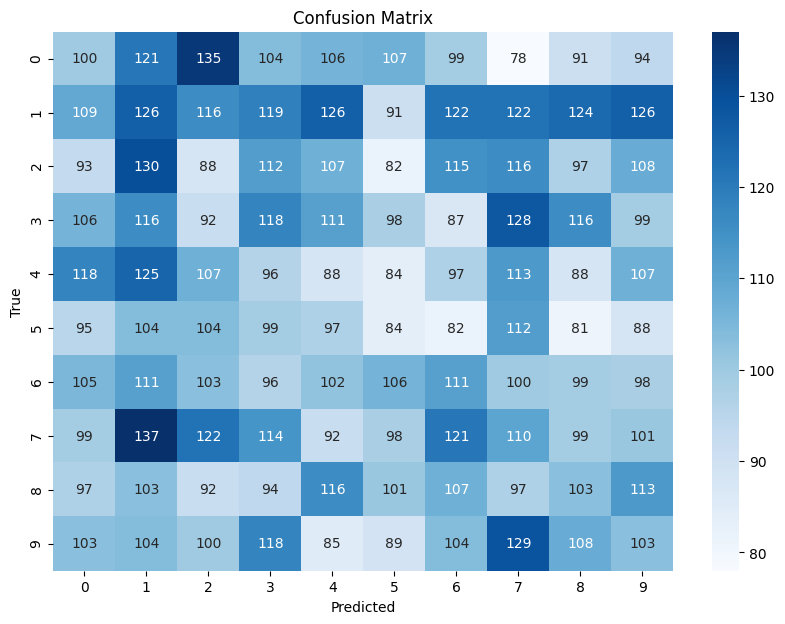

In [4]:
#display results
display_and_save_confution_matrix(cm, test_dataset, cm_save_path)